In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load the datasets
train_url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx?raw=true'
test_url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx?raw=true'

train_data = pd.read_excel(train_url)
test_data = pd.read_excel(test_url)

In [3]:
train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
train_data.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [5]:
#null values
train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
# Fill missing values
train_data.fillna({
    'TITLE': 'Unknown',
    'CITY': 'Unknown',
    'LOCALITY': 'Unknown',
    'RATING': train_data['RATING'].mode()[0],
    'VOTES': train_data['VOTES'].mode()[0]
}, inplace=True)

In [7]:
test_data.fillna({
    'TITLE': 'Unknown',
    'CITY': 'Unknown',
    'LOCALITY': 'Unknown',
    'RATING': test_data['RATING'].mode()[0],
    'VOTES': test_data['VOTES'].mode()[0]
}, inplace=True)

In [8]:
# Convert RATING and VOTES columns to numeric, replacing non-numeric values
train_data['RATING'] = pd.to_numeric(train_data['RATING'], errors='coerce')
train_data['VOTES'] = pd.to_numeric(train_data['VOTES'].str.replace(' votes', ''), errors='coerce')
test_data['RATING'] = pd.to_numeric(test_data['RATING'], errors='coerce')
test_data['VOTES'] = pd.to_numeric(test_data['VOTES'].str.replace(' votes', ''), errors='coerce')


In [9]:
# Fill any remaining missing values with median
train_data['RATING'].fillna(train_data['RATING'].median(), inplace=True)
train_data['VOTES'].fillna(train_data['VOTES'].median(), inplace=True)
test_data['RATING'].fillna(test_data['RATING'].median(), inplace=True)
test_data['VOTES'].fillna(test_data['VOTES'].median(), inplace=True)

In [10]:
# Encode categorical variables
categorical_vars = ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']

In [11]:
# Combine train and test data for consistent encoding
combined_data = pd.concat([train_data[categorical_vars], test_data[categorical_vars]], axis=0)


In [12]:
for var in categorical_vars:
    le = LabelEncoder()
    combined_data[var] = le.fit_transform(combined_data[var])
    train_data[var] = le.transform(train_data[var])
    test_data[var] = le.transform(test_data[var])

In [13]:
# Split the training data into training and validation sets
X = train_data.drop(['RESTAURANT_ID', 'COST'], axis=1)
y = train_data['COST']

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale numerical variables
scaler = StandardScaler()
numerical_vars = ['RATING', 'VOTES']


In [16]:
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_val[numerical_vars] = scaler.transform(X_val[numerical_vars])
test_data[numerical_vars] = scaler.transform(test_data[numerical_vars])


In [17]:
# Function to evaluate models
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    print(f"Mean Squared Error: {mean_squared_error(y_val, y_pred)}")
    print(f"R-squared: {r2_score(y_val, y_pred)}")
    plt.scatter(y_val, y_pred)
    plt.xlabel('Actual Cost')
    plt.ylabel('Predicted Cost')
    plt.title('Actual vs Predicted Cost')
    plt.show()

In [18]:
# Train and evaluate different models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


Training Linear Regression...
Evaluating Linear Regression...
Mean Squared Error: 296992.0924757126
R-squared: 0.17479244846441422


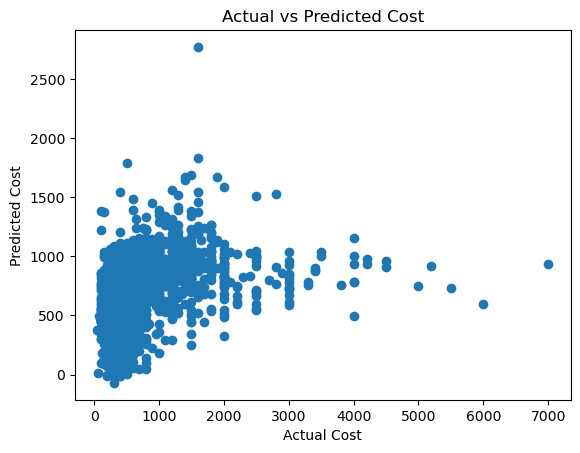

Training Decision Tree...
Evaluating Decision Tree...
Mean Squared Error: 163222.53546099292
R-squared: 0.5464779290236115


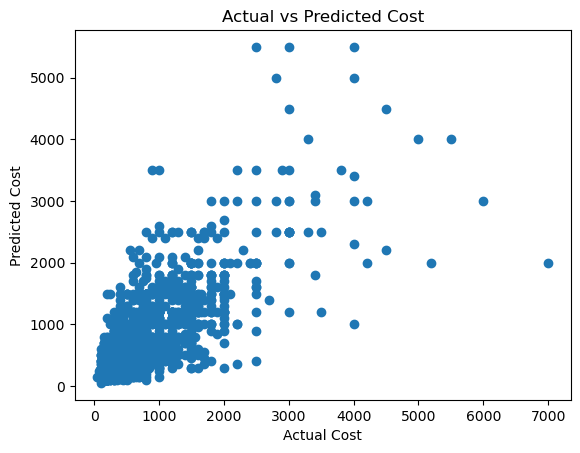

Training Random Forest...
Evaluating Random Forest...
Mean Squared Error: 97014.45041890528
R-squared: 0.7304404422811284


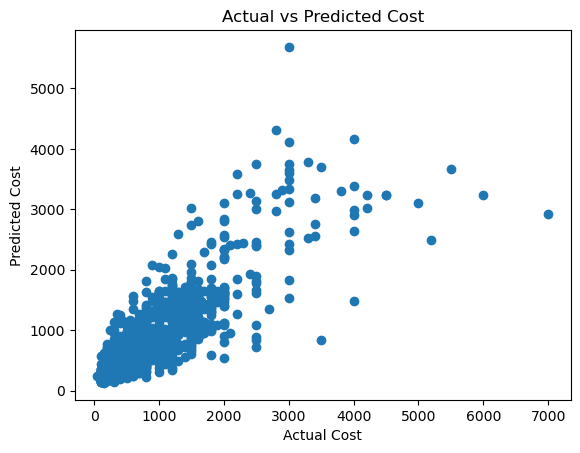

Training Gradient Boosting...
Evaluating Gradient Boosting...
Mean Squared Error: 100140.89236296015
R-squared: 0.7217534651964349


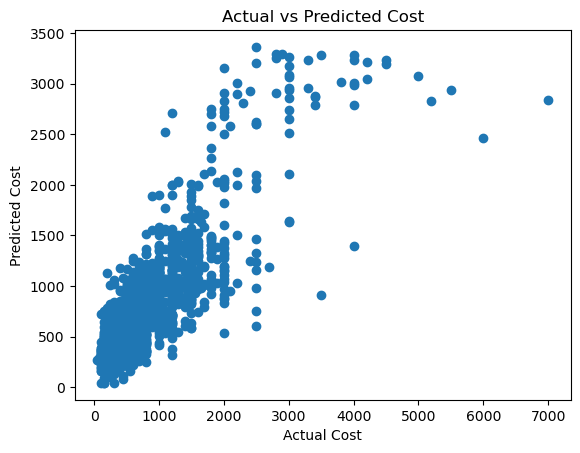

In [19]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_val, y_val)

In [20]:
# Select the best model (example: RandomForest)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
# Make predictions on the test data
test_predictions = best_model.predict(test_data.drop(['RESTAURANT_ID'], axis=1))

In [22]:
# Save the predictions to a CSV file
submission = pd.DataFrame({'RESTAURANT_ID': test_data['RESTAURANT_ID'], 'COST': test_predictions})
submission.to_csv('restaurant_food_cost_predictions.csv', index=False)
print("Predictions saved to restaurant_food_cost_predictions.csv")

Predictions saved to restaurant_food_cost_predictions.csv
